In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [116]:
#Reading/importation/loading of the train and test files into the notebook

train = pd.read_csv('titanic_train.csv')

test = pd.read_csv('titanic_test.csv')

LET US START WITH BASIC  EDA AND PREPROCESSING FOR THE TRAIN DATASET

In [8]:
#Overview of the first 5 rows of the train dataset (Microsoft Excel can be used for this)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
#This gives a general information about each column(attributes) of the train dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
#This gives information about the number of unique values each column(attributes) has

train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [66]:
#This gives us information about the number of null (N/A), empty values in each column(attributes) 

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above cell, we can see that three columns have null or missing values

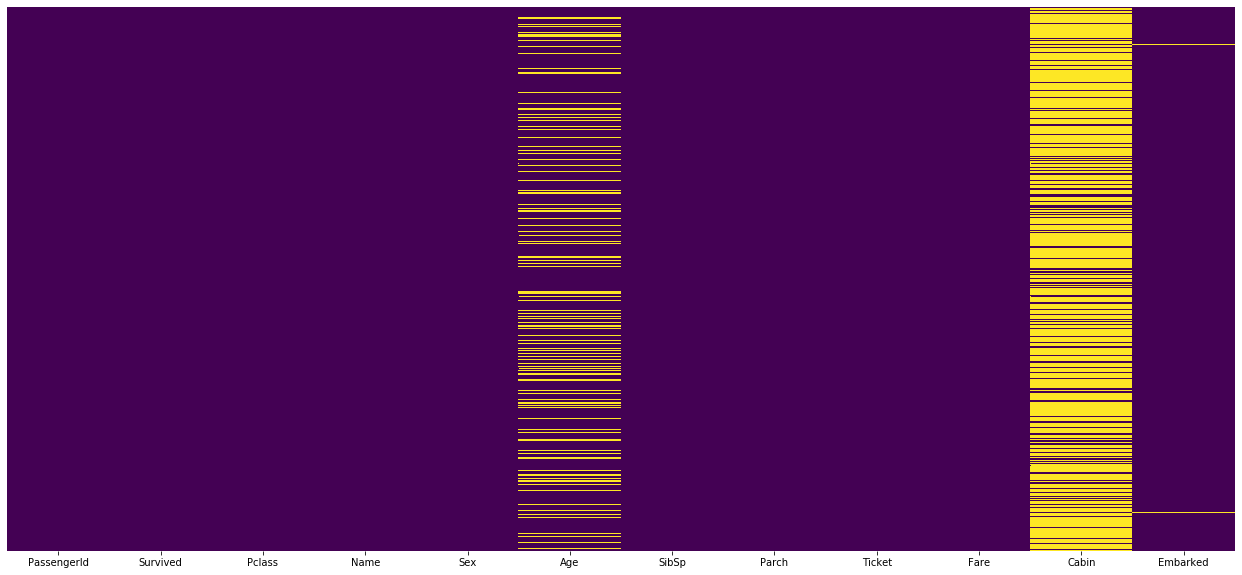

In [14]:
#Visualization of columns with missing values

plt.figure(figsize=(22,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

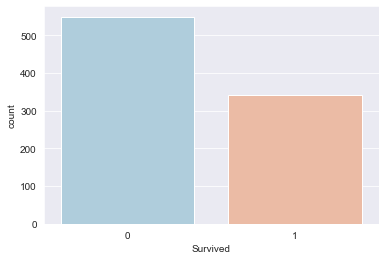

In [16]:
#Let visualize the target column which is 'Survived'

sns.set_style('darkgrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

It can be see from the cell above that the people who did not survive were more than does that survived

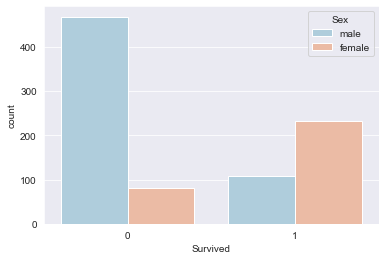

In [19]:
#Let visualize the sex and Survived columns 

sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

From above we can see that a high proportion of those that did not survive were of the male sex

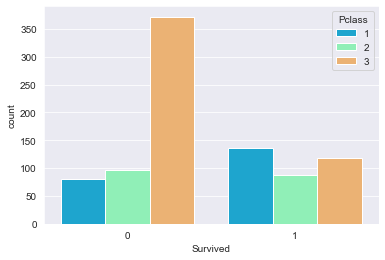

In [21]:
#Let visualize the Pclass and Survived columns

sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

From above we can see that a high proprotion of those that did not survive came from the Pclass category 3 (third class)

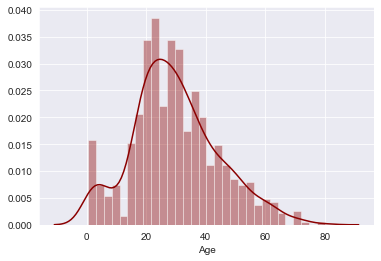

In [22]:
#Lets plot the age distribution

sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=30)

Seems a high proportion of people on the ship were between ages 20 and 40

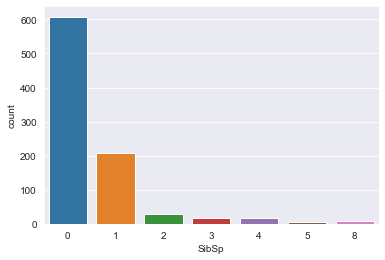

In [23]:
#Let plot the siblings and spouses distribution

sns.countplot(x='SibSp',data=train)

Seems most of passengers on the titanic were not siblings or spouses


## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. 
One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


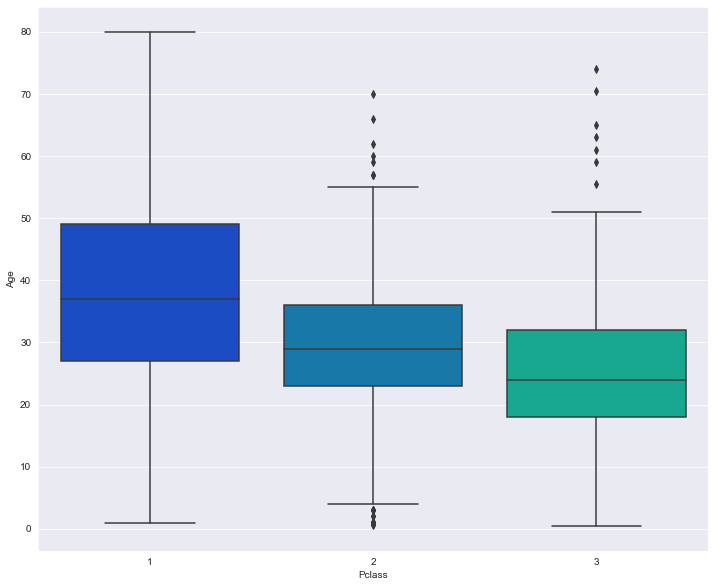

In [30]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [31]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [67]:
#LETS APPLY THE FUNCTION TO THE TRAIN DATASET

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

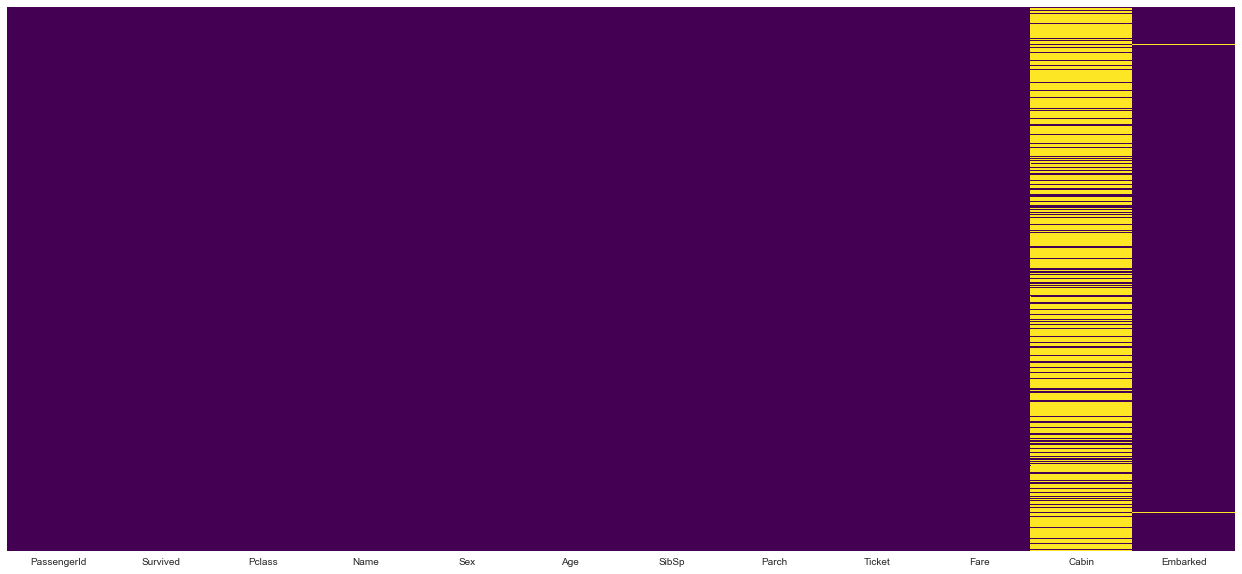

In [68]:
#CHECKING AGAIN FOR THE MISSING VALUES

plt.figure(figsize=(22,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

HURRAY OUR FUNCTION HAS HELPED TO IMPUTE THE MISSING VALUES IN AGE

In [69]:
#LETS GO AHEAD AND DROP THE CABIN COLUMN

train.drop('Cabin',axis=1,inplace=True)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


THE CABIN COLUMN IS GONE...

In [72]:
#Now lets drop the rows in Embarked that having null or missing values

train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


TO IDENTIFY CATEGORICAL FEATURES THEY USUALLY THE ONES WITH THE 'object' DTYPE

FROM THE CELL ABOVE WE HAVE 4 OF SUCH FEATURES

In [74]:
#let us use convert sex and embarked to dummy variables

sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [75]:
#Let us add this dummy variables to the train dataset 

train_copy = pd.concat([train,sex,embark],axis=1)

In [76]:
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


WE CAN SEE COLUMNS 'MALE', 'Q' AND 'S' these were the dummy variable gotten from sex and embarked

In [78]:
#Lets drop the original sex and embarked columns. We will also drop the PassengerId and ticket columns

train_copy.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'],axis=1,inplace=True)

WE DROPPED NAME, TICKET AND PASSENGERID BECAUSE ALL THE VALUES IN THOSE COLUMNS ARE UNIQUE

In [79]:
train_copy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [80]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


FINISHED ...OUR DATA IS READY FOR MODELLING

BUT BEFORE WE MOVE ON TO THE TEST DATA LETS OUTPUT OUR CLEANED TRAIN DATASET INTO A CSV FILE

In [81]:
#outputting a file
train_output = train_copy

train_output.to_csv('CLEANED_TRAIN.csv', index=False) 

LETS NOW DEAL WITH THE TEST DATASET

In [117]:
#Overview of the first 5 rows of the test dataset (Microsoft Excel can be used for this)


test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [118]:
#This gives a general information about each column(attributes) of the test dataset

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [119]:
#This gives us information about the number of null (N/A), empty values in each column(attributes) 

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

THIS SHOWS THAT THE AGE, FARE AND CABIN COLUMNS OF THE TEST DATASET HVE MISSING VALUES

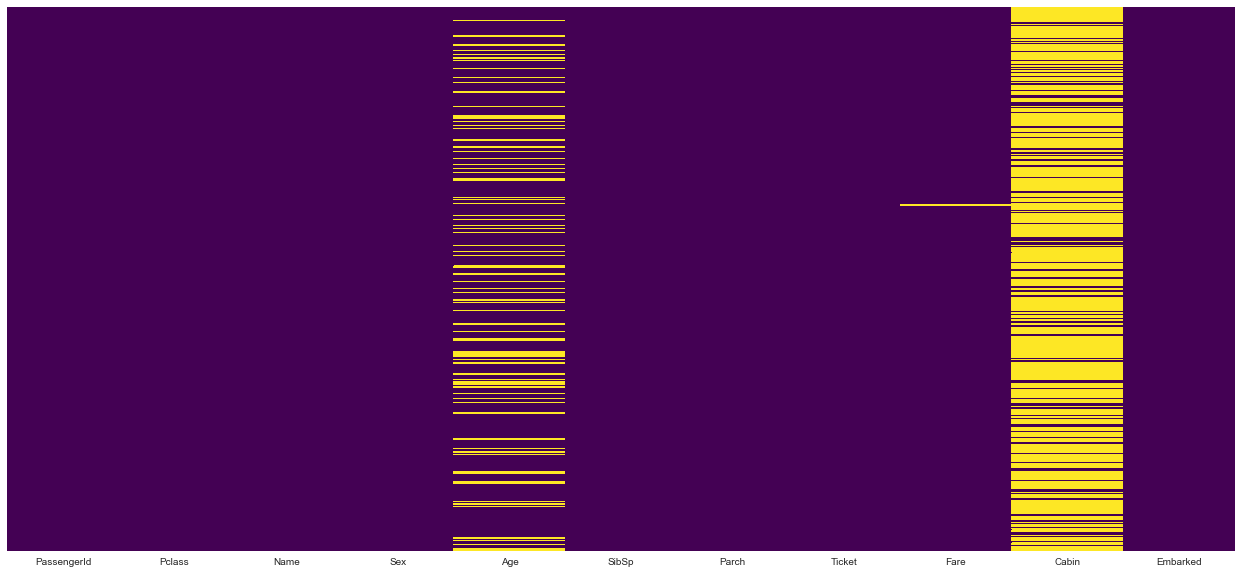

In [120]:
#Visualization of columns with missing values

plt.figure(figsize=(22,10))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

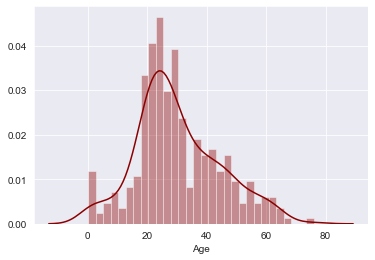

In [121]:
#Lets check out the age distribution in the test dataset

sns.distplot(test['Age'].dropna(),kde=True,color='darkred',bins=30)

SIMILAR TO THE AGE DISTRIBUTION ON THE TRAIN DATASET

## Data Cleaning
Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows.

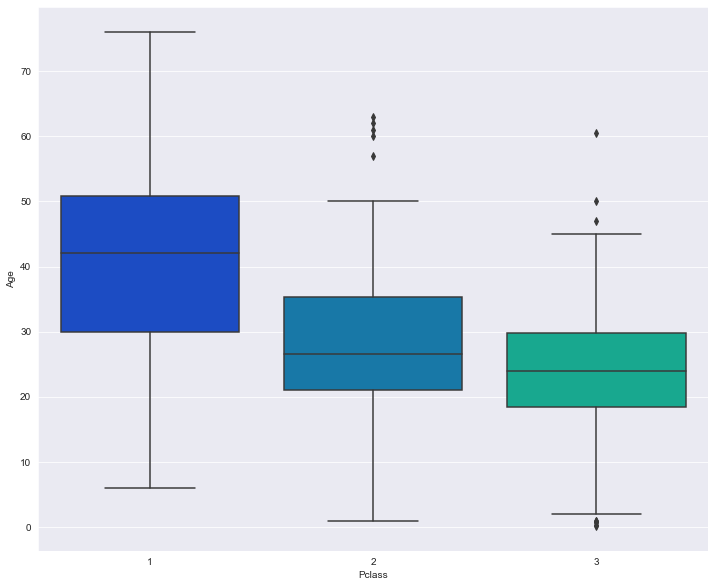

In [122]:
#CHECKING OUT THE AGE DISTRIBUTION IN RELATION TO THE PCLASS 

plt.figure(figsize=(12, 10))
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older which was also evidence in the train dataset

In [123]:
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 26

        else:
            return 24

    else:
        return Age

In [124]:
#LETS APPLY THE FUNCTION TO THE TEST DATASET

test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

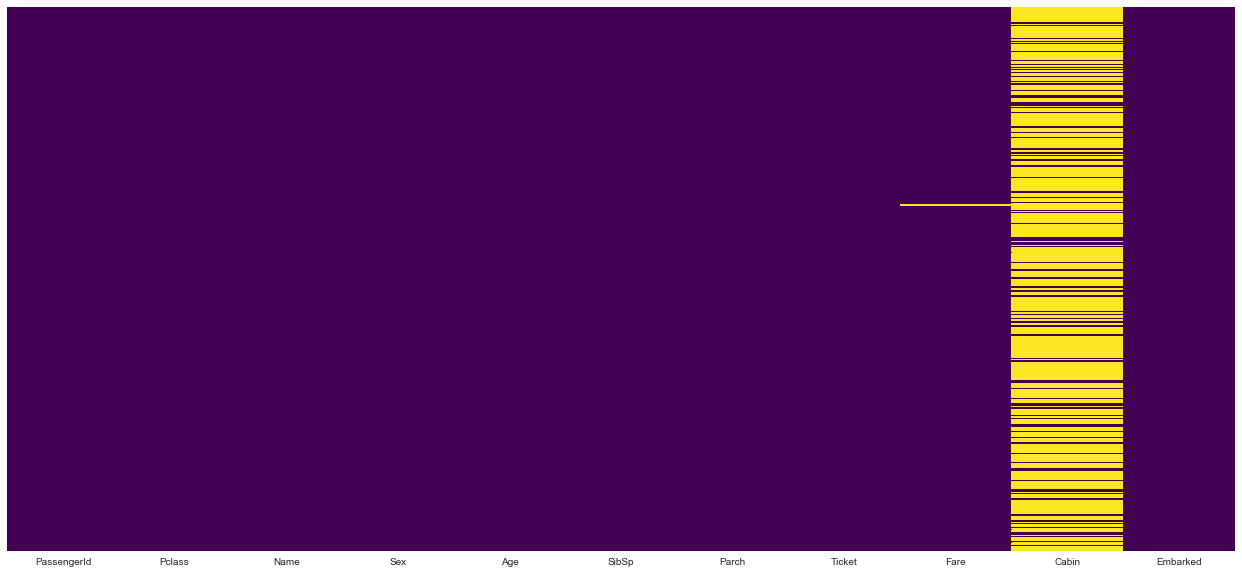

In [125]:
#CHECKING AGAIN FOR THE MISSING VALUES

plt.figure(figsize=(22,10))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [126]:
#LETS GO AHEAD AND DROP THE CABIN COLUMN

test.drop('Cabin',axis=1,inplace=True)

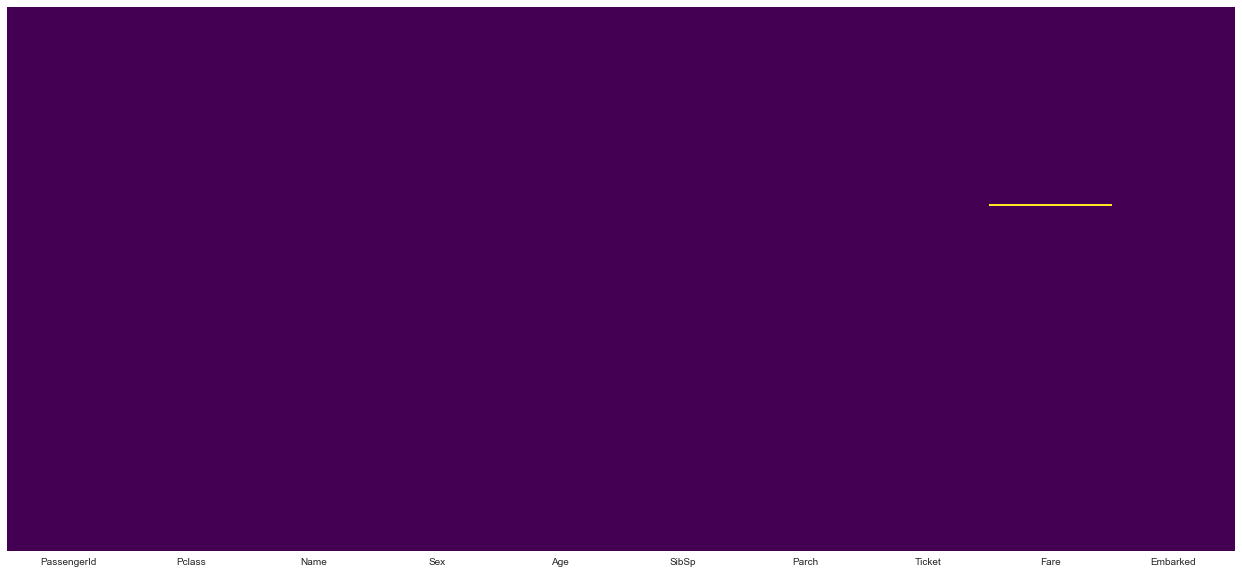

In [127]:
#CHECKING AGAIN FOR THE MISSING VALUES

plt.figure(figsize=(22,10))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [128]:
#Now lets fill the row in column 'Fare'

test.fillna(np.mean(test['Fare']), inplace= True)

In [129]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


ALL MISSING VALUE HAVE BEEN DEALT WITH

NOW LET US DEAL WITH THE CATEGORICAL VARIABLES

In [130]:
#let us use convert sex and embarked to dummy variables

sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test = pd.get_dummies(test['Embarked'],drop_first=True)

In [131]:
#Let us add this dummy variables to the test dataset 

test_copy = pd.concat([test,sex_test,embark_test],axis=1)

In [132]:
test_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [133]:
#Lets drop the original sex and embarked columns. We will also drop ticket columns

test_copy.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [134]:
test_copy.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


FINISHED ...OUR DATA IS READY FOR MODELLING

LETS OUTPUT OUR CLEANED TEST DATASET INTO A CSV FILE

In [135]:
#outputting a file
test_output = test_copy

test_output.to_csv('CLEANED_TEST.csv', index=False) 

NOW LETS US TRAIN OUR ALGORITHMS WITH THE CLEANED TRAIN DATA AND PREDICT ON THE CLEANED DATA...(Simple Basic Modelling.ipynb)